In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_pickle('./dataset/나혼자FIFA_훈련데이터최종.pkl')
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1,PredictTotal,PredictOverall,PredictClubLogWageMean,PredictLogValue
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056,2.298240,2.090291,1.988824,1.622995,1344,1343,117.616683,152,159.229523,25.789825
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693,2.237408,2.122623,1.991895,1.654479,1276,1221,107.915979,146,158.479589,24.846485
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128,2.237408,2.122623,1.991895,1.654479,1276,1199,104.864707,146,158.479589,24.544665
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265,2.237408,2.122623,1.991895,1.654479,1344,1267,104.520858,143,158.479589,24.724429
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783,2.237408,2.122623,1.991895,1.654479,1276,1218,107.211487,145,158.479589,24.993153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404,1.141394,1.000000,1.000000,1.000000,67,-354,32.184140,62,61.120305,9.903857
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927,1.224301,1.141394,1.000000,1.000000,83,-293,35.601290,68,68.155150,11.073709
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743,1.425160,1.366217,1.141394,1.000000,109,-320,50.960039,82,84.931485,13.812157
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035,1.449298,1.283179,1.224301,1.000000,121,-436,42.801413,81,86.623728,13.408636


In [3]:
df['PredictWage'] = 1

In [4]:
for i in range(df.shape[0]):
    df.PredictWage[i] = 2*(df.ClubWeight100[i]-1)* \
    (df.AgeWeight[i]*df.InternationalReputationWeight[i]* \
    df.RealFaceWeight[i]*df.PositionClassWeight[i]*df.LoanedFromWeight[i]* \
    df.ClubWeight75[i]*df.ClubLogWageMin[i])+df.LogWage.min()

In [5]:
print(len(df.LogWage.unique()))
np.round(np.sort(df.LogWage.unique()),1)

141


array([ 48.8,  55.6,  59.7,  62.6,  64.8,  66.6,  68.1,  69.5,  70.7,
        71.7,  72.7,  73.5,  74.3,  75.1,  75.8,  76.4,  77. ,  77.6,
        78.1,  78.6,  79.1,  79.6,  80. ,  80.5,  80.9,  81.3,  81.6,
        82. ,  82.4,  82.7,  83. ,  83.3,  83.6,  83.9,  84.2,  84.5,
        84.8,  85.1,  85.3,  85.6,  85.8,  86.1,  86.3,  86.5,  86.7,
        87. ,  87.2,  87.4,  87.6,  87.8,  88. ,  88.2,  88.4,  88.6,
        88.8,  88.9,  89.1,  89.3,  89.5,  89.6,  89.8,  89.9,  90.1,
        90.3,  90.4,  90.6,  90.7,  90.9,  91. ,  91.2,  91.3,  91.4,
        91.6,  91.7,  91.9,  92. ,  92.1,  92.2,  92.4,  92.5,  92.6,
        92.7,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.6,  93.7,
        93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,  94.6,
        94.7,  95.2,  95.7,  96.1,  96.6,  97. ,  97.4,  97.7,  98.1,
        98.4,  98.8,  99.1,  99.4,  99.7, 100. , 100.3, 100.6, 100.9,
       101.1, 101.4, 101.7, 101.9, 102.1, 102.4, 102.8, 103.1, 103.3,
       103.5, 103.7,

In [6]:
np.round(np.sort(df.LogWage.unique())/df.LogWage.min(),2)

array([1.  , 1.14, 1.22, 1.28, 1.33, 1.37, 1.4 , 1.43, 1.45, 1.47, 1.49,
       1.51, 1.52, 1.54, 1.55, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.67, 1.68, 1.69, 1.7 , 1.7 , 1.71, 1.72,
       1.72, 1.73, 1.73, 1.74, 1.74, 1.75, 1.76, 1.76, 1.77, 1.77, 1.77,
       1.78, 1.78, 1.79, 1.79, 1.8 , 1.8 , 1.8 , 1.81, 1.81, 1.82, 1.82,
       1.82, 1.83, 1.83, 1.83, 1.84, 1.84, 1.85, 1.85, 1.85, 1.85, 1.86,
       1.86, 1.86, 1.87, 1.87, 1.87, 1.88, 1.88, 1.88, 1.88, 1.89, 1.89,
       1.89, 1.89, 1.9 , 1.9 , 1.9 , 1.9 , 1.91, 1.91, 1.91, 1.91, 1.92,
       1.92, 1.92, 1.92, 1.93, 1.93, 1.93, 1.93, 1.93, 1.94, 1.94, 1.94,
       1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  , 2.  , 2.01, 2.02, 2.03,
       2.03, 2.04, 2.05, 2.05, 2.06, 2.06, 2.07, 2.07, 2.08, 2.09, 2.09,
       2.1 , 2.1 , 2.11, 2.11, 2.12, 2.12, 2.13, 2.13, 2.14, 2.14, 2.14,
       2.16, 2.16, 2.17, 2.18, 2.19, 2.2 , 2.22, 2.24, 2.3 ])

In [7]:
Wellington = df[df.Club=='Wellington Phoenix'][['Club','Name','LogWage','PredictLogWage']]
Wellington.sort_values(by='PredictLogWage', ascending=True)

,Club,Name,LogWage,PredictLogWage
10512,Wellington Phoenix,C. Elliot,48.751973,78
11943,Wellington Phoenix,L. Cacace,48.751973,78
13420,Wellington Phoenix,S. Singh,48.751973,78
11711,Wellington Phoenix,B. Waine,48.751973,79
11730,Wellington Phoenix,A. Rufer,48.751973,85
12888,Wellington Phoenix,D. Fox,48.751973,85
13217,Wellington Phoenix,F. Kurto,48.751973,85
13695,Wellington Phoenix,R. Lowry,48.751973,85
11509,Wellington Phoenix,L. Fenton,48.751973,86
13509,Wellington Phoenix,A. Durante,48.751973,86


In [8]:
Wellington.describe()

,LogWage,PredictLogWage
count,16.000000,16.000000
mean,50.729090,87.375000
std,4.435778,10.397916
min,48.751973,78.000000
25%,48.751973,83.500000
50%,48.751973,85.500000
75%,48.751973,91.000000
max,62.557500,122.000000


In [9]:
Incheon = df[df.Club=='Incheon United FC'][['Club','Name','LogWage','PredictLogWage']]
Incheon.sort_values(by='PredictLogWage', ascending=True)

,Club,Name,LogWage,PredictLogWage
13425,Incheon United FC,Kim Jin Ya,48.751973,76
11350,Incheon United FC,Lim Eun Soo,48.751973,78
12762,Incheon United FC,Jeong Dong Yun,48.751973,78
11870,Incheon United FC,Kim Dong Min,48.751973,78
13527,Incheon United FC,Jung San,48.751973,78
10635,Incheon United FC,Kim Jung Ho,48.751973,78
10719,Incheon United FC,Lee Jeong Bin,48.751973,78
11080,Incheon United FC,Lee Jin Hyung,48.751973,79
13587,Incheon United FC,Yun Sang Ho,48.751973,80
8560,Incheon United FC,Kwak Hae Seong,55.645204,80


In [10]:
Incheon.describe()

,LogWage,PredictLogWage
count,20.000000,20.000000
mean,50.879468,79.800000
std,3.914737,1.852452
min,48.751973,76.000000
25%,48.751973,78.000000
50%,48.751973,80.000000
75%,50.475281,81.000000
max,59.687076,83.000000


In [11]:
Kaiserslautern = df[df.Club=='1. FC Kaiserslautern'][['Club','Name','LogWage','PredictLogWage']]
Kaiserslautern.sort_values(by='PredictLogWage', ascending=True)

,Club,Name,LogWage,PredictLogWage
12722,1. FC Kaiserslautern,J. Scholz,48.751973,82
11143,1. FC Kaiserslautern,F. Botiseriu,48.751973,82
12237,1. FC Kaiserslautern,C. Sickinger,48.751973,87
12043,1. FC Kaiserslautern,L. Gottwalt,48.751973,87
11577,1. FC Kaiserslautern,T. Bergmann,48.751973,87
10855,1. FC Kaiserslautern,D. Schad,48.751973,87
14299,1. FC Kaiserslautern,C. Kühlwetter,48.751973,90
13332,1. FC Kaiserslautern,O. Özdemir,48.751973,90
14261,1. FC Kaiserslautern,W. Hesl,48.751973,90
6686,1. FC Kaiserslautern,L. Spalvis,62.557500,92


In [12]:
Kaiserslautern.describe()

,LogWage,PredictLogWage
count,18.000000,18.000000
mean,53.415718,89.944444
std,5.237938,3.826721
min,48.751973,82.000000
25%,48.751973,87.000000
50%,52.198589,91.000000
75%,55.645204,93.000000
max,62.557500,94.000000


In [13]:
df.Nationality.unique()

array(['Argentina', 'Croatia', 'Spain', 'Wales', 'Germany', 'Belgium',
       'Colombia', 'Brazil', 'Gabon', 'Egypt', 'France', 'Italy', 'Chile',
       'Denmark', 'Algeria', 'England', 'Uruguay', 'Costa Rica',
       'Senegal', 'Portugal', 'Bosnia Herzegovina', 'Serbia',
       'Netherlands', 'Armenia', 'Greece', 'Dominican Republic',
       'Switzerland', 'Iceland', 'Slovakia', 'Poland', 'Turkey',
       'Ecuador', 'Guinea', 'Austria', 'Slovenia', 'Nigeria', 'Cameroon',
       'Scotland', 'Republic of Ireland', 'Ukraine', 'Mexico',
       'Ivory Coast', 'Paraguay', 'Montenegro', 'DR Congo', 'New Zealand',
       'Sweden', 'Equatorial Guinea', 'Ghana', 'Morocco', 'Japan',
       'Russia', 'Czech Republic', 'Romania', 'Burkina Faso', 'Norway',
       'Jamaica', 'Cape Verde', 'Iran', 'United States', 'Madagascar',
       'Hungary', 'Central African Rep.', 'Curacao', 'Canada',
       'Northern Ireland', 'Venezuela', 'Tunisia', 'Australia', 'Kosovo',
       'Israel', 'Mali', 'Benin', 'Fin

# LogWage가 아닌 Wage로 구단 기울기를 구해보자.

In [14]:
for i in range(df.shape[0]):
    df.ClubWeight100[i] = df[df.Club==df.Club[i]].Wage.describe()[7]/df.Wage.min()
    df.ClubWeight75[i] = df[df.Club==df.Club[i]].Wage.describe()[6]/df.Wage.min()
    df.ClubWeight50[i] = df[df.Club==df.Club[i]].Wage.describe()[5]/df.Wage.min()
    df.ClubWeight25[i] = df[df.Club==df.Club[i]].Wage.describe()[4]/df.Wage.min()

In [15]:
df[df.Nationality=='Korea Republic']

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1,PredictTotal,PredictOverall,PredictClubLogWageMean,PredictLogValue,PredictWage
1324,3250,182152,Koo Ja Cheol,29,Korea Republic,76,57.577169,FC Augsburg,975000.0,2025,Right,2.0,4.0,1,CAM,"Aug 31, 2015",0,2019,62.407093,59.092676,1664000.0,13.790194,4.0,Medfielder,80.867179,1571.818182,73.606243,1495.0,73.105502,130.0,48.751973,1.333,1.36,1.38,1.07,2,1.00,59.969116,28.0,19.50,11.5,3.50,334,126,69.500715,107,108.441444,18.353763,334
1420,3120,226380,Hwang Hee Chan,22,Korea Republic,72,67.369686,Hamburger SV,650000.0,1783,Right,1.0,3.0,0,ST,NaN,1,"Jun 30, 2019",62.407093,54.692856,0.0,13.384729,3.0,Foward,80.459087,1175.909091,70.706469,1235.0,71.196356,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.15,61.419901,24.0,12.00,9.5,3.25,201,0,69.278391,102,104.479627,17.720129,201
1842,2470,195912,Suk Hyun Jun,27,Korea Republic,74,55.945083,Stade de Reims,845000.0,1793,Right,2.0,4.0,1,ST,"Aug 9, 2018",0,2022,56.846487,55.572820,1755000.0,13.647093,4.0,Foward,78.123782,1227.200000,71.133050,1430.0,72.661288,130.0,48.751973,1.333,1.36,1.38,1.13,3,1.00,56.185755,22.0,13.00,11.0,4.00,314,78,64.408942,103,103.873744,17.746169,314
2556,1820,200588,Hong Jeong Ho,28,Korea Republic,72,51.048824,Jeonbuk Hyundai Motors,325000.0,1720,Right,1.0,4.0,0,RCB,NaN,1,"Jan 4, 2019",55.734366,57.332748,0.0,12.691584,4.0,Defender,75.071411,703.181818,65.570366,715.0,65.736802,130.0,48.751973,1.333,1.00,1.00,1.07,1,1.15,54.881015,14.0,7.75,5.5,3.00,171,-82,59.351683,96,94.728867,16.070024,171
2656,1690,211927,Kwon Chang Hoon,24,Korea Republic,75,62.473427,Dijon FCO,1105000.0,1957,Left,1.0,3.0,0,RM,"Jan 18, 2017",0,2021,66.855579,65.252426,2288000.0,13.915357,4.5,Medfielder,74.330753,1053.000000,69.603477,1105.0,70.085052,130.0,48.751973,1.229,1.00,1.00,1.07,2,1.00,65.084545,17.0,11.00,8.5,5.50,159,-11,68.636341,101,99.834823,17.383540,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13930,130,242100,Yoo Ji Ha,19,Korea Republic,59,54.312996,Pohang Steelers,39000.0,1300,Right,1.0,3.0,0,CB,"Jan 1, 2018",0,2021,47.949517,35.333644,73190.0,10.571343,3.0,Defender,48.751973,333.478261,58.125719,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,1,1.00,45.828183,6.0,3.00,2.0,1.50,95,-243,45.438627,77,79.913357,12.838219,95
13981,130,232402,Kim Woo Suk,21,Korea Republic,57,44.520479,Daegu FC,20800.0,1283,Right,1.0,2.0,0,CB,"Jan 1, 2016",0,2019,46.837395,47.653142,30160.0,9.942756,2.0,Defender,48.751973,183.181818,52.159234,130.0,48.751973,130.0,48.751973,1.146,1.00,1.00,1.07,1,1.00,46.423398,3.0,1.75,1.0,1.00,78,-360,37.880194,66,67.863868,10.814058,78
14016,130,231944,Woo Chan Yang,21,Korea Republic,63,54.312996,Pohang Steelers,71500.0,1511,Left,1.0,4.0,0,LB,"Dec 31, 2015",0,2020,47.949517,55.572820,103740.0,11.177467,5.5,Defender,48.751973,333.478261,58.125719,260.0,55.645204,130.0,48.751973,1.146,1.00,1.00,1.07,1,1.00,52.184288,6.0,3.00,2.0,1.50,102,-185,48.846155,79,79.913357,13.163164,102
14067,130,243358,Park Chang Jun,21,Korea Republic,60,44.520479,Gangwon FC,33800.0,1418,Right,1.0,2.0,0,RB,"Jan 1, 2018",0,2021,44.613153,53.812891,49010.0,10.428246,2.0,Defender,48.751973,265.000000,55.834963,260.0,55.645204,130.0,48.751973,1.146,1.00,1.00,1.07,1,1.00,47.475520,5.0,2.75,2.0,1.00,96,-348,44.368633,75,76.388232,12.332488,96


In [16]:
drop_duplicates  = df['Club ClubWageMean ClubWageMin ClubWeight25 \
                       ClubWeight50 ClubWeight75 ClubWeight100'.split()]
drop_duplicates = drop_duplicates.drop_duplicates()
drop_duplicates = drop_duplicates.sort_values(by='ClubWageMean', ascending=False)
drop_duplicates = drop_duplicates.reset_index()
drop_duplicates.drop('index',axis=1,inplace=True)
drop_duplicates.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650
Club,Real Madrid,FC Barcelona,Manchester City,Juventus,Manchester United,Liverpool,Chelsea,Tottenham Hotspur,FC Bayern München,Arsenal,Napoli,Paris Saint-Germain,Milan,Everton,Inter,Roma,West Ham United,Atlético Madrid,Beşiktaş JK,Leicester City,Olympique Lyonnais,Bayer 04 Leverkusen,Borussia Dortmund,Lazio,Fenerbahçe SK,Fiorentina,Watford,Wolverhampton Wanderers,Southampton,Olympique de Marseille,AS Monaco,Bournemouth,Sassuolo,Burnley,Galatasaray SK,Crystal Palace,RB Leipzig,Torino,Brighton & Hove Albion,Club América,Newcastle United,Fulham,Valencia CF,Stoke City,Tigres U.A.N.L.,Atlético Mineiro,Celtic,VfL Wolfsburg,Nottingham Forest,Villarreal CF,Sampdoria,Real Sociedad,Cagliari,Cardiff City,Bologna,Middlesbrough,FC Girondins de Bordeaux,TSG 1899 Hoffenheim,FC Schalke 04,Girona FC,Grêmio,VfB Stuttgart,Eintracht Frankfurt,Parma,Atalanta,Huddersfield Town,Rangers FC,Real Betis,Derby County,Monterrey,Medipol Başakşehir FK,Leeds United,SD Eibar,Internacional,OGC Nice,Cruzeiro,Borussia Mönchengladbach,CD Leganés,AS Saint-Étienne,Sevilla FC,Hannover 96,Stade Rennais FC,Deportivo Alavés,Fluminense,Getafe CF,Boca Juniors,Levante UD,West Bromwich Albion,Hertha BSC,Bristol City,Guangzhou Evergrande Taobao FC,Al Hilal,RC Celta,SV Werder Bremen,Wigan Athletic,Athletic Club de Bilbao,RCD Espanyol,FC Nantes,Trabzonspor,Aston Villa,1. FSV Mainz 05,Guadalajara,FC Red Bull Salzburg,Toulouse Football Club,Udinese,Sporting CP,FC Porto,Montpellier HSC,Al Nassr,Brentford,Independiente,LOSC Lille,En 

<Figure size 1440x360 with 0 Axes>

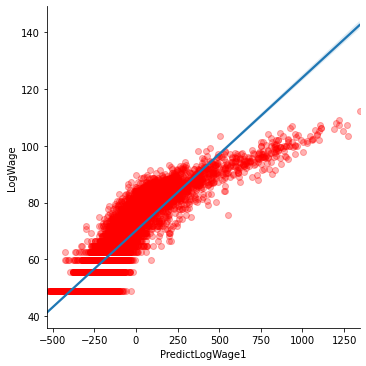

In [17]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<AxesSubplot:>

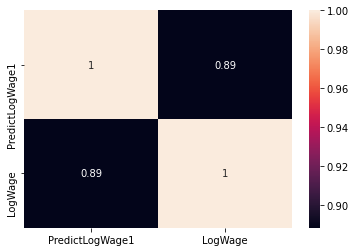

In [18]:
sns.heatmap(df[['PredictLogWage1','LogWage']].corr(), annot=True)

In [19]:
df1 = df.copy()

In [20]:
for i in range(df.shape[0]):
    df.PredictLogWage1[i]=df.PredictLogWage1[i]+(df.Total.max()-df.Total[i])*5 \
                            +(df.LogValue.max()-df.LogValue[i])*10

In [21]:
for i in range(df.shape[0]):
    df1.PredictLogWage1[i]=df1.PredictLogWage1[i]-(df1.Total.max()-df1.Total[i])*7 \
                            -(df1.LogValue.max()-df1.LogValue[i])*10-(df1.ClubLogWageMean.max()-df1.ClubLogWageMean[i])*15

<Figure size 1440x360 with 0 Axes>

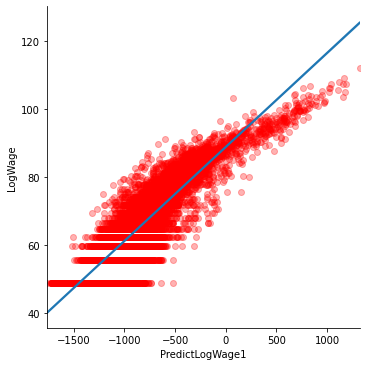

In [22]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df1, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<AxesSubplot:>

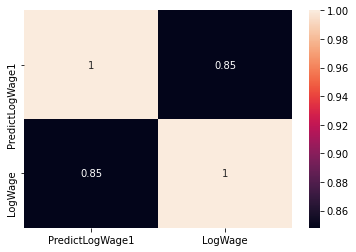

In [23]:
sns.heatmap(df[['PredictLogWage1','LogWage']].corr(), annot=True)

<AxesSubplot:>

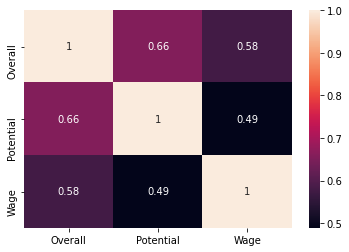

In [24]:
sns.heatmap(df[['Overall','Potential','Wage']].corr(), annot=True)

In [25]:
for i in range(df.shape[0]):
    df.Overall[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])*df.Overall[i]+df.Total.min()

<AxesSubplot:>

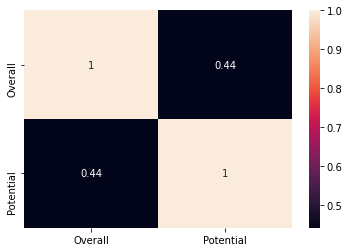

In [26]:
sns.heatmap(df[['Overall','Potential']].corr(), annot=True)

In [27]:
for i in range(df.shape[0]):
    df.Overall[i]=df.Overall[i]-(df.LogValue.max()-df.LogValue[i])*10

<AxesSubplot:>

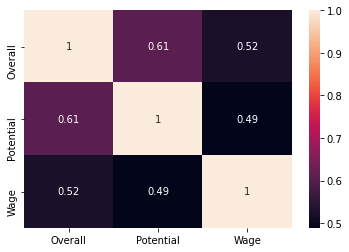

In [28]:
sns.heatmap(df[['Overall','Potential','Wage']].corr(), annot=True)

<AxesSubplot:>

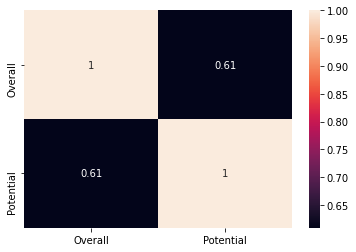

In [29]:
sns.heatmap(df[['Overall','Potential']].corr(), annot=True)

In [30]:
for i in range(df.shape[0]):
    df.Overall[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])*df.Overall[i]+df.Total.min()

In [31]:
for i in range(df.shape[0]):
    df.PredictLogWage1[i]=df.PredictLogWage1[i]-(df.ClubLogWageMean.max()-df.ClubLogWageMean[i])*7

<Figure size 1440x360 with 0 Axes>

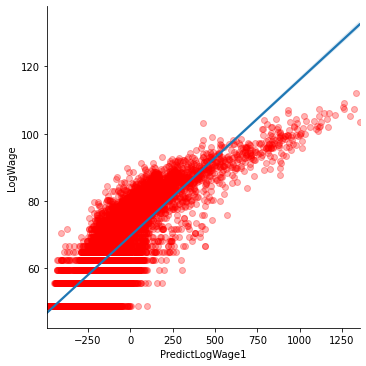

In [32]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<AxesSubplot:>

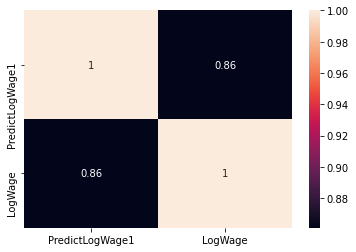

In [33]:
sns.heatmap(df[['PredictLogWage1','LogWage']].corr(), annot=True)

In [34]:
df = pd.read_pickle('./dataset/나혼자FIFA_사전정리.pkl')
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin
0,73450,158023,L. Messi,31,Argentina,94,94,FC Barcelona,14365000.0,2202,Left,5.0,4.0,4.0,6,Messi,1,RF,10.0,"Jul 1, 2004",0,2021,167.5,72,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500
1,54600,177003,L. Modrić,32,Croatia,91,91,Real Madrid,8710000.0,2280,Right,4.0,4.0,4.0,1,Lean,1,RCM,10.0,"Aug 1, 2012",0,2020,170.0,66,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
2,49400,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,6630000.0,2201,Right,4.0,3.0,3.0,2,Normal,1,RCB,15.0,"Aug 1, 2005",0,2020,180.0,82,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
3,46150,173731,G. Bale,28,Wales,88,88,Real Madrid,7800000.0,2279,Left,4.0,3.0,4.0,2,Lean,1,ST,11.0,"Sep 2, 2013",0,2022,182.5,82,89,89,89,89,89,89,89,89,88,88,88,88,83,83,83,88,76,73,73,73,76,74,70,70,70,74,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
4,46150,182521,T. Kroos,28,Germany,90,90,Real Madrid,9945000.0,2190,Right,4.0,5.0,3.0,6,Normal,1,LCM,8.0,"Jul 17, 2014",0,2022,180.0,76,81,81,81,84,85,85,85,84,87,87,87,85,89,89,89,85,82,85,85,85,82,80,75,75,75,80,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,65,Atlético Huila,61750.0,1759,Left,1.0,3.0,2.0,6,Normal,0,LB,24.0,"Aug 7, 2018",0,2023,175.0,78,59,59,59,60,59,59,59,60,59,59,59,63,60,60,60,63,65,64,64,64,65,65,64,64,64,65,62.0,45.0,60.0,62.0,38.0,58.0,64.0,66.0,59.0,60.0,75.0,76.0,67.0,63.0,61.0,66.0,63.0,77.0,74.0,32.0,68.0,61.0,50.0,57.0,49.0,52.0,60.0,60.0,58.0,12.0,16.0,15.0,9.0,16.0

In [35]:
df['AgeWeight'] = np.round(1/(df.Age-30.5)**2,3)
df.AgeWeight

0        4.000
1        0.444
2        0.444
3        0.160
4        0.160
         ...  
14319    0.033
14320    0.024
14321    0.006
14322    0.009
14323    0.006
Name: AgeWeight, Length: 14324, dtype: float64

In [36]:
# Age 변환

def change_value_from(x):
    out = ''
    if x==4: out = 14
    elif x==0.444: out = 13
    elif x==0.16: out = 12
    elif x==0.082: out = 11
    elif x==0.049: out = 10
    elif x==0.033: out = 9
    elif x==0.024: out = 8
    elif x==0.018: out = 7
    elif x==0.014: out = 6
    elif x==0.011: out = 5
    elif x==0.009: out = 4
    elif x==0.008: out = 3
    elif x==0.006: out = 2
    elif x==0.005: out = 1
    return int(out)

df.AgeWeight = df.AgeWeight.apply(lambda x: change_value_from(x))
df.AgeWeight

0        14
1        13
2        13
3        12
4        12
         ..
14319     9
14320     8
14321     2
14322     4
14323     2
Name: AgeWeight, Length: 14324, dtype: int64

In [37]:
b = []
for i in range(1,15):
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.AgeWeight==i].Wage.median()))
    print('===================')
    a = int(df[df.AgeWeight==i].Wage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),3)
print('계산한 가중치')
print(b)

1의 중앙 Wage
130
2의 중앙 Wage
130
3의 중앙 Wage
130
4의 중앙 Wage
260
5의 중앙 Wage
260
6의 중앙 Wage
390
7의 중앙 Wage
390
8의 중앙 Wage
390
9의 중앙 Wage
520
10의 중앙 Wage
520
11의 중앙 Wage
650
12의 중앙 Wage
650
13의 중앙 Wage
650
14의 중앙 Wage
780
[130, 130, 130, 260, 260, 390, 390, 390, 520, 520, 650, 650, 650, 780]
계산한 가중치
[1. 1. 1. 2. 2. 3. 3. 3. 4. 4. 5. 5. 5. 6.]


In [38]:
b = []
for i in range(5):
    i = i+1
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.InternationalReputation==i].Wage.median()))
    print('===================')
    a = int(df[df.InternationalReputation==i].Wage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round((b/b[0]),2)
print('계산한 가중치')
print(b)

1의 중앙 Wage
390
2의 중앙 Wage
3250
3의 중앙 Wage
9100
4의 중앙 Wage
21450
5의 중앙 Wage
37700
[390, 3250, 9100, 21450, 37700]
계산한 가중치
[ 1.    8.33 23.33 55.   96.67]


In [39]:
df[df.RealFace==0].Wage.median()

390.0

In [40]:
df[df.RealFace==1].Wage.median()

3705.0

In [41]:
RealFaceWeight = np.round(df[df.RealFace==1].Wage.median()/ \
                          df[df.RealFace==0].Wage.median(),2)
print('계산한 가중치')
RealFaceWeight

계산한 가중치


9.5

In [42]:
b = []
for i in df.PositionClass.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.PositionClass==i].Wage.median()))
    print('===================')
    a = int(df[df.PositionClass==i].Wage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b[::-1]/b[-1],2)
print('계산한 가중치')
print(b)

Foward의 중앙 Wage
520
Medfielder의 중앙 Wage
390
Defender의 중앙 Wage
390
GoalKeeper의 중앙 Wage
260
[520, 390, 390, 260]
계산한 가중치
[1.  1.5 1.5 2. ]


In [43]:
b = []
for i in df.LoanedFrom.unique().tolist():
    print('{}의 중앙 Wage'.format(i))
    print(int(df[df.LoanedFrom==i].Wage.median()))
    print('===================')
    a = int(df[df.LoanedFrom==i].Wage.median())
    b.append(a)
print(b)

b = np.array(b)
b = np.round(b/b[0],2)
print('계산한 가중치')
print(b)

0의 중앙 Wage
390
1의 중앙 Wage
910
[390, 910]
계산한 가중치
[1.   2.33]
